<H1>Weather data analisys from <a href="http://projects.knmi.nl/klimatologie/daggegevens/selectie.cgi">KNMI.nl</a></H1>

<h2>Preparing the environment</h2>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


<h2> Reading data file header containing fields descriptions. Storing in Dataset "names". Cleaning data a bit.

In [2]:
names=pd.read_csv('KNMI_20200419.txt', skipinitialspace=True, skiprows=57, sep=" *= ", nrows=39, names=["name","meaning"], engine='python')

In [3]:
names.name=names.name.str[2:]


<H2> Reading weather data from the same file.

In [4]:
data=pd.read_csv('KNMI_20200419.txt', skipinitialspace=True, skiprows=99, names=['STN', 'DATE', 'DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN',
       'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH',
       'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN',
       'PNH', 'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN',
       'UNH', 'EV24'])

In [5]:
data.DATE=pd.to_datetime(data.DATE, format='%Y%m%d')

In [6]:
data.set_index('DATE', inplace=True)

In [7]:
data.TG=data.TG/10
data.TX=data.TX/10
data.TN=data.TN/10

<H2> Grouping the data by years. We only use data from Da Bilt weather station (STN=260) which is the oldest and has more historical data.

In [8]:
yearly=data[((data.index.year>1905) & (data.index.year<2020) & (data.STN==260))].groupby(data[((data.index.year>1905) & (data.index.year<2020)& (data.STN==260))].index.year)

<h2> Plotting charts for each field

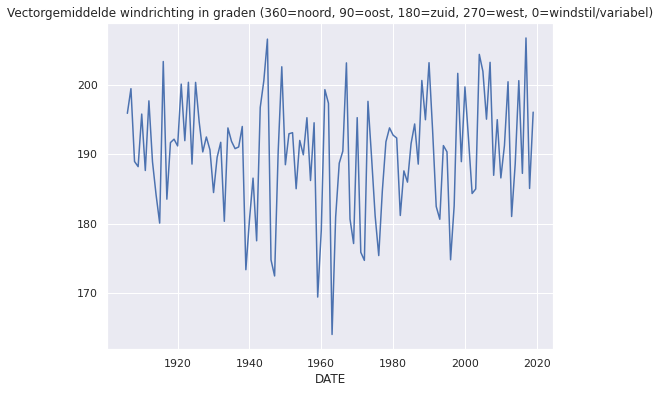

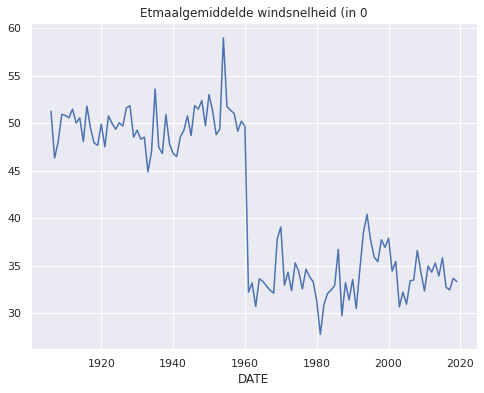

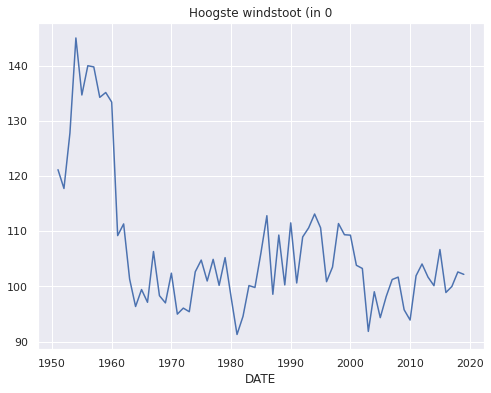

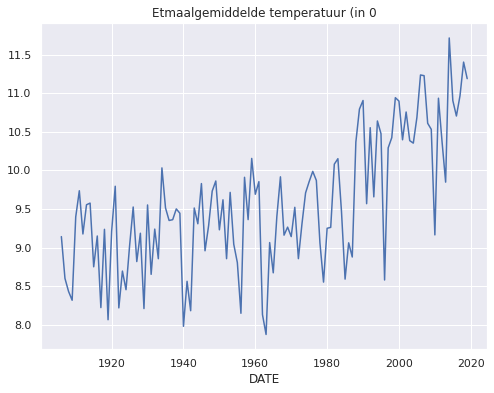

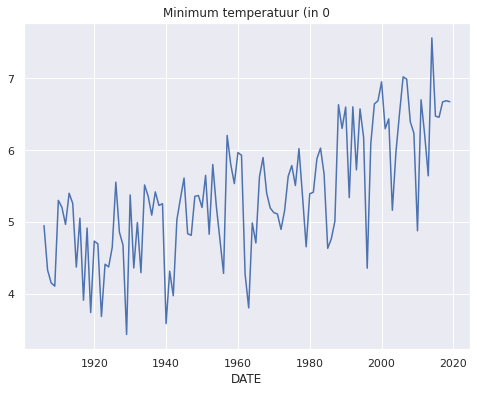

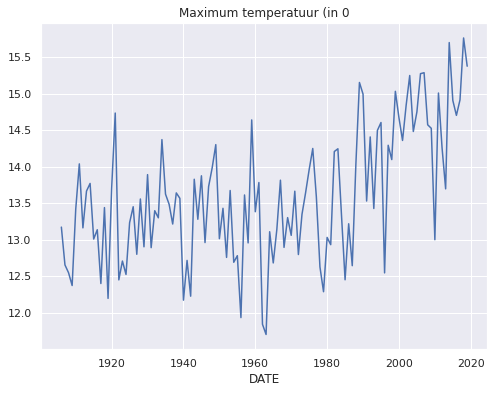

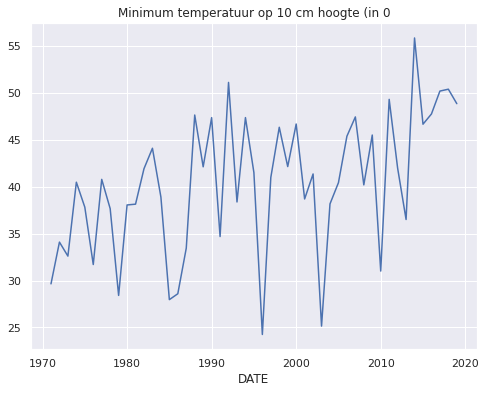

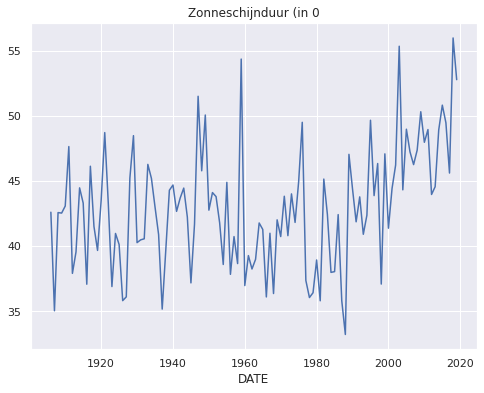

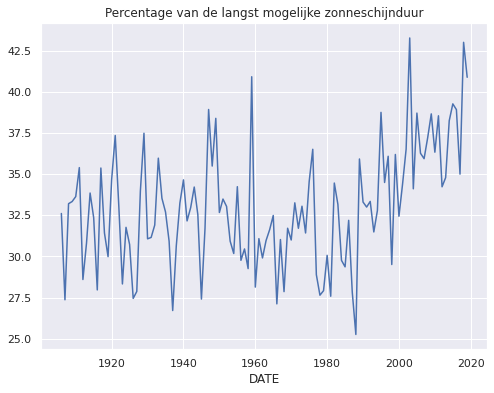

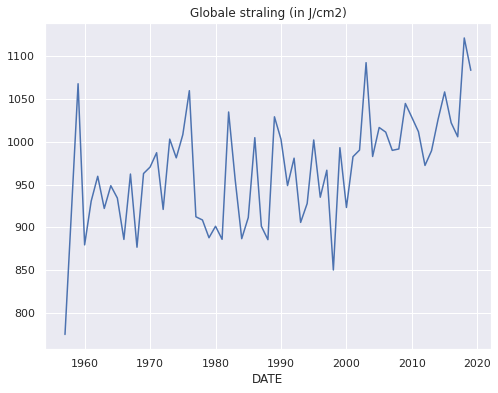

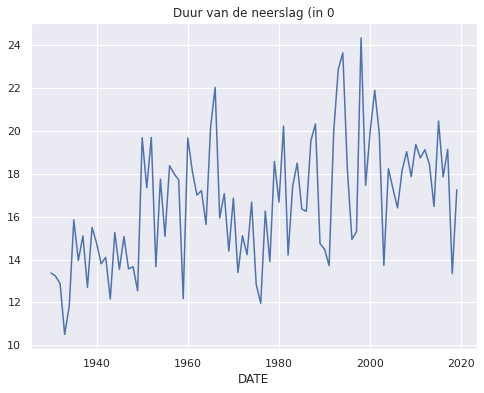

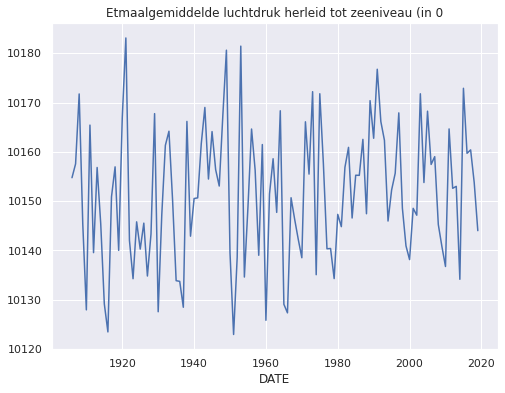

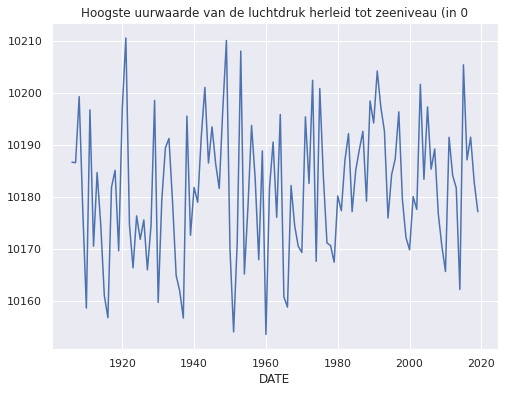

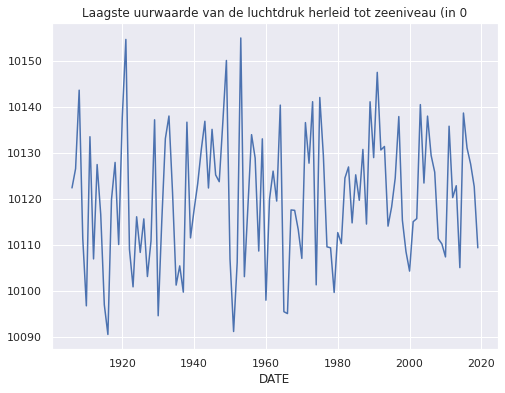

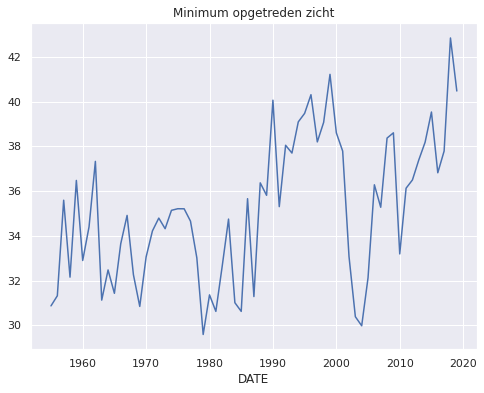

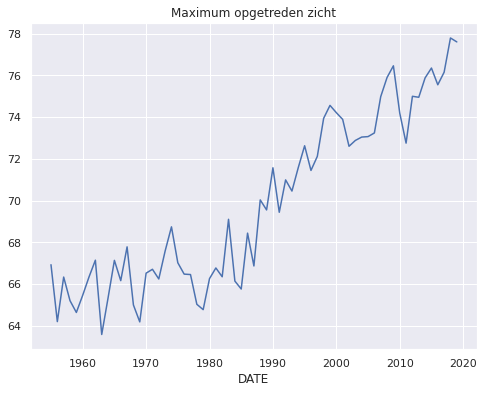

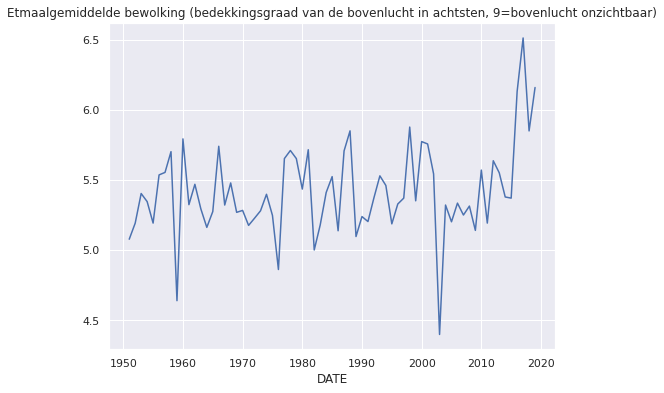

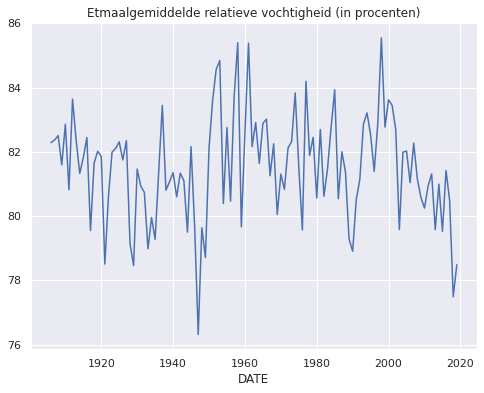

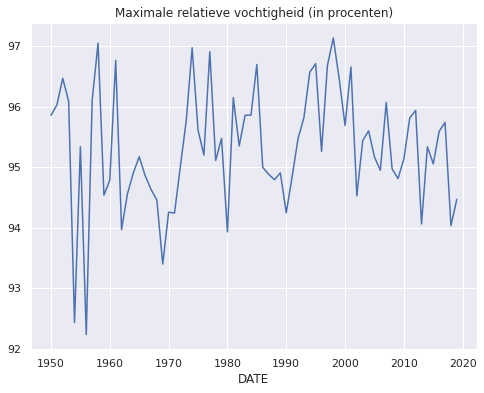

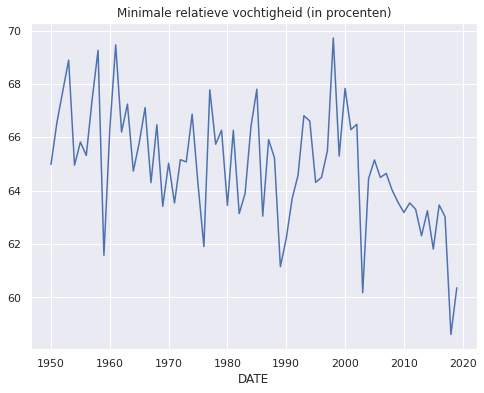

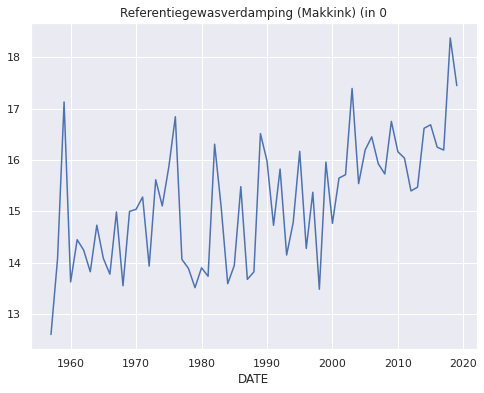

In [9]:
for i in data.columns:
    if (i != "STN") & ("H" not in i):
        yearly[i].mean().plot(figsize=(8, 6),title=list(names[names.name==i]['meaning'])[0].partition(";")[0].partition(".")[0])
        plt.show()


<h2> The most interesting charts are these:

Text(0.5, 1.0, 'Sunshine duration (in 0.1 hours) calculated from the global radiation (-1 for <0.05 hours)')

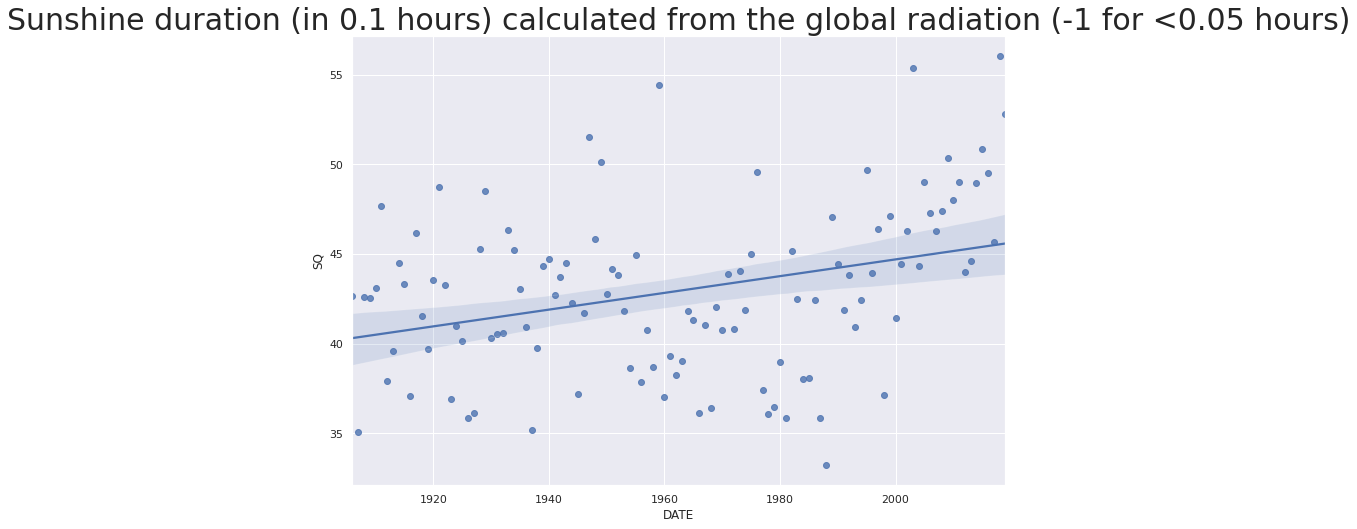

In [21]:
sns.regplot(data=yearly.SQ.mean().dropna(), x=yearly.SQ.mean().dropna().index,y=yearly.SQ.mean().dropna(), fit_reg=True).set_title("Sunshine duration (in 0.1 hours) calculated from the global radiation (-1 for <0.05 hours)",fontsize=30)

Text(0.5, 1.0, 'Daily mean temperature (in 0.1 degrees Celsius)')

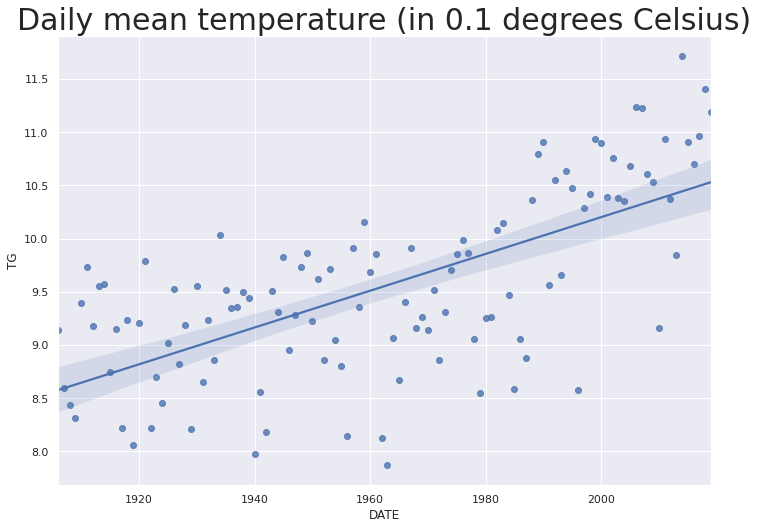

In [22]:
sns.regplot(data=yearly.TG.mean().dropna(), x=yearly.TG.mean().dropna().index,y=yearly.TG.mean().dropna(), fit_reg=True).set_title("Daily mean temperature (in 0.1 degrees Celsius)",fontsize=30)

Text(0.5, 1.0, 'Maximum visibility')

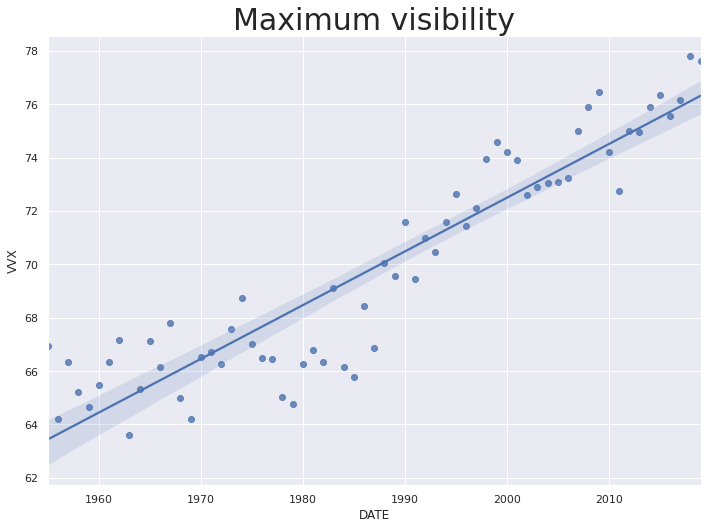

In [23]:
sns.regplot(data=yearly.VVX.mean().dropna(), x=yearly.VVX.mean().dropna().index,y=yearly.VVX.mean().dropna(), fit_reg=True).set_title("Maximum visibility",fontsize=30)

Text(0.5, 1.0, 'Global radiation (in J / cm2)')

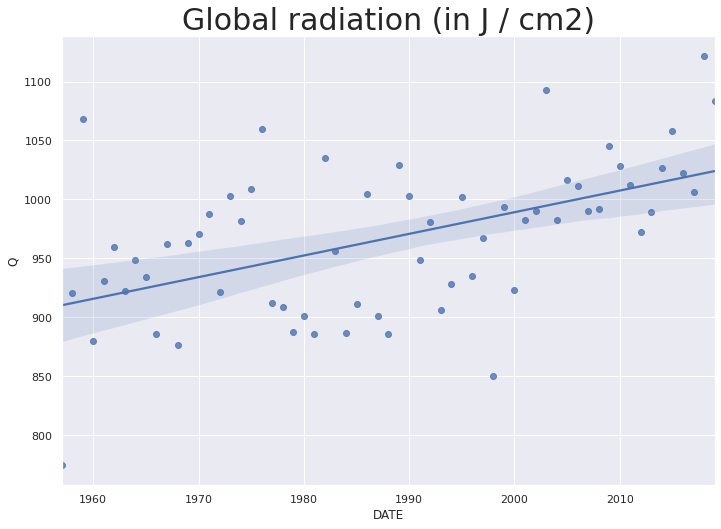

In [24]:
sns.regplot(data=yearly.Q.mean().dropna(), x=yearly.Q.mean().dropna().index,y=yearly.Q.mean().dropna(), fit_reg=True).set_title("Global radiation (in J / cm2)",fontsize=30)